## Assignment 05



This dataset comes from the Amazon website and represents 1,000 reviews which were labeled (by humans) as positive or negative. In this assignment, we will study apply dimensionality reduction methods to improve our understanding of text data and to predict the sentiment of a set of texts. 

In [1]:
#!pip install gdown
!gdown https://drive.google.com/uc?id=1habwBbNCj6wFIDvxLa7hdP2xakA_tcDG

Downloading...
From: https://drive.google.com/uc?id=1habwBbNCj6wFIDvxLa7hdP2xakA_tcDG
To: /content/Reviews_sample.csv
100% 456k/456k [00:00<00:00, 113MB/s]


In [2]:
import numpy as np
import pandas as pd
!pip install umap-learn
import umap
from sklearn.decomposition import PCA, TruncatedSVD
import sklearn.feature_extraction.text as sktext
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from itertools import product

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
seed = 0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Task 1: Decomposition of the texts [ /66 marks]

### Question 1.1

The dataset comes with the text and a binary variable which represents the sentiment, either positive or negative. Import the data and use sklearn's `TfidfVectorizer` to eliminate accents, special characters, and stopwords. In addition, make sure to eliminate words that appear in less than 5% of documents and those that appear in over 95%. You can also set `sublinear_tf` to `True`. After that, split the data into train and test with `test_size = 0.2` and `seed = seed`. Calculate the [Tf-Idf transform](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html) for both train and test. Note that you need to fit and transform the inputs for the train set but you only need to transform the inputs for the test set. Don't forget to turn the sparse matrices to dense ones after you apply the `Tf-Idf` transform.  

In [3]:
# Load the data [ /1 marks]
data = pd.read_csv('https://drive.google.com/uc?id=1habwBbNCj6wFIDvxLa7hdP2xakA_tcDG')

# Display the first 5 rows [ /1 marks]
data = data.sort_values(by = 'label', ascending = False)
data.head()

,text,label
0,Stuning even for the non-gamer: This sound tr...,1
503,Textbook: Should have been a nationwide eleme...,1
505,"Great Book: Very easy to read, simple argumen...",1
515,Back to basics...: Sometimes back to basics i...,1
516,A great alternative perspective: Particularly...,1


In [4]:
# Defining the TfIDFTransformer [ /4 marks]
TFIDF = sktext.TfidfVectorizer(strip_accents = 'unicode', 
                               stop_words = 'english', 
                               min_df = 0.05, 
                               max_df = 0.95, 
                               sublinear_tf = True)


# Train/test split [ /2 marks]
trainData, testData = train_test_split(data, test_size = 0.2, random_state = seed)

# Calculate the Tf-Idf transform on training and test [ /4 marks]
TFIDF_train = TFIDF.fit_transform(trainData['text']).toarray()
TFIDF_train_q2 = TFIDF.fit_transform(trainData['text'])
TFIDF_test = TFIDF.transform(testData['text']).toarray()
TFIDF_test_q2 = TFIDF.transform(testData['text'])

From here on, you will use the variables `TfIDF_train` and `TfIDF_test` as the input for the different tasks, and the `y_train` and `y_test` labels for each dataset (if required). Print the number of indices in the ouput using [`TfIDFTransformer.get_feature_names()` method](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html).

In [5]:
# Print the number of indices [ /2 marks]
print(f'Training Indices: {len(TFIDF_train[0, :])}')
print(f'Testing Indices: {len(TFIDF_test[0, :])}')

Training Indices: 63
Testing Indices: 63


### Question 1.2
Now we have the TfIDF matrix so we can start working on the data. We hope to explore what some commonly occuring concepts are in the text reviews. We can do this using PCA. A PCA transform of the TF-IDF matrix will give us a basis of the text data, each component representing a *concept* or set of words that are correlated. Correlation in text can be interpreted as a relation to a similar topic. Calculate a PCA transform of the training data using the **maximum** number of concepts possible. Make a plot of the explained variance that shows the cumulative explained variance per number of concepts.



Text(0, 0.5, 'Explained variance %')

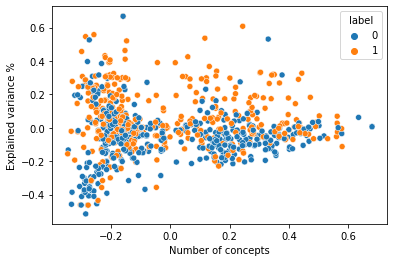

In [6]:
# Apply PCA on training data and get the explained variance [ / 4 marks]
nPCA = PCA(n_components = 63)
nPCA.fit(TFIDF_train)

# Plotting explained variance with number of concepts [ / 4 marks]
z1 = nPCA.transform(TFIDF_train)
sns.scatterplot(x = z1[:, 0], y = z1[:, 1], hue = trainData['label'])
plt.xlabel('Number of concepts')
plt.ylabel('Explained variance %')

**Question:** Exactly how many concepts do we need to correctly explain at least 80% of the data?


In [7]:
# To get the exact index where the variance is above 80% [ / 4 marks]
#idx = 

**Your Answer:** 

### Question 1.3

Let's examine the first three concepts by looking how many variance they explained and showing the 10 words that are the most important in each of these three concepts (as revealed by the absolute value of the PCA weight in each concept).


In [8]:
# Explained variance [ / 2 marks]
explained_variance = np.sum(nPCA.explained_variance_)*100
print('The first three components explain %.2f%% of the variance.' % (explained_variance))

The first three components explain 88.38% of the variance.


In [9]:
# Get 10 most important words for each component [ / 4 marks]
wIndex = TFIDF.get_feature_names_out()

top10 = []
for i in range(len(nPCA.components_)):
  top10.append(wIndex[nPCA.components_[i, :] > 0][:10])

#Example
print(top10[60])

['author' 'bad' 'best' 'better' 'book' 'books' 'bought' 'buy' 'classic'
 'day']


In [10]:
# Words for concept 1 [ / 2 marks]
print(wIndex[nPCA.components_[0, :] > 0])

['author' 'book' 'books' 'boring' 'characters' 'classic' 'did' 'good'
 'hard' 'hawthorne' 'long' 'novel' 'plot' 'read' 'reading' 'recommend'
 'say' 'story' 'think' 'time' 'way' 'writing' 'written']


In [11]:
# Words for concept 2 [ / 2 marks]
print(wIndex[nPCA.components_[1, :] > 0])

['best' 'book' 'bought' 'buy' 'day' 'does' 'got' 'great' 'look' 'lot'
 'love' 'makes' 'product' 'read' 'recommend' 'think' 'time' 'use' 'wear'
 'work' 'worth' 'written' 'year' 'years']


In [12]:
# Words for concept 3 [ / 2 marks]
print(wIndex[nPCA.components_[2, :] > 0])

['bad' 'best' 'better' 'book' 'boring' 'characters' 'going' 'good' 'great'
 'little' 'look' 'lot' 'love' 'movie' 'old' 'people' 'plot' 'read'
 'really' 'think' 'want' 'worth' 'writing' 'written' 'year']



**Question:** What is the cumulative variance explained by these three concepts? What would you name each of these concepts? [ / 2 marks]

*Hint: If in a concept you would get the words 'dog', 'cat', 'fish' as the most important ones, you could name the concept 'animals' or 'pets'.*

The cumulative variance explained by these are 88.38% and I would name concept 1: writer (author, book, books, characters), concept 2: Shopping (bought, buy, recommend, product, worth, use, wear), concept 3: Comparison (bad, best, better, good, great)

### Question 1.4

 Apply the PCA transformation to the test dataset. Use only the first two components and make a scatter plot of the cases. Identify positive and negative cases by colouring points with different sentiments with different colours.


Text(0, 0.5, 'Explained variance %')

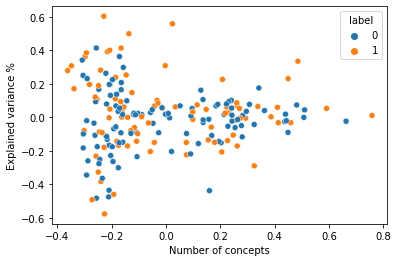

In [13]:
# Apply PCA to the test dataset [ / 2 marks]
nPCA = PCA(n_components = 2)
nPCA.fit(TFIDF_test)

# Plot the two different set of points with different markers and labels [ /4 marks]
z1 = nPCA.transform(TFIDF_test)
sns.scatterplot(x = z1[:, 0], y = z1[:, 1], hue = testData['label'])
plt.xlabel('Number of concepts')
plt.ylabel('Explained variance %')

**Question:** What can we say about where the positive and negative cases lie in our plot? Could we use these concepts to discriminate positive and negative cases? If yes, why? If no, why not? Discuss your findings. [ /2 marks]
 
**Your answer:** The positive cases tend to lie within a larger variance range compared to that of the negative cases.  EX the positive cases show datapoints near the extremes of the plot like 0.6 and -0.6 whereas the negative cases do not go past 0.4 or ~-0.5.  I don't think that we would be able to discriminate the positive and negative cases since they are so intertwined together throughout the plot.  It would be hard to distinguish the two from each other as despite the range difference, the two cases have very similar plot housing.

### Question  1.5

Repeat the process above, only now using a UMAP projection with two components. Test all combinations of ```n_neighbors=[2, 10, 25]``` and ```min_dist=[0.1, 0.25, 0.5]``` over the train data and choose the projection that you think is best, and apply it over the test data. Use 1000 epochs, a cosine metric and random initialization. If you have more than 8GB of RAM (as in Colab), you may want to set ```low_memory=False``` to speed up computations.

*Hint: [This link](https://stackoverflow.com/questions/16384109/iterate-over-all-combinations-of-values-in-multiple-lists-in-python) may be helpful.*



UMAP(angular_rp_forest=True, init='random', low_memory=False, metric='cosine', min_dist=0.25, n_epochs=1000, n_neighbors=25, random_state=0, verbose=True)
Fri Dec  9 03:03:05 2022 Construct fuzzy simplicial set
Fri Dec  9 03:03:06 2022 Finding Nearest Neighbors
Fri Dec  9 03:03:10 2022 Finished Nearest Neighbor Search
Fri Dec  9 03:03:18 2022 Construct embedding


Epochs completed:   0%|            0/1000 [00:00]

Fri Dec  9 03:03:36 2022 Finished embedding


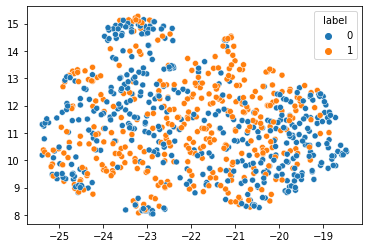

In [14]:
# Set parameters
n_neighbors=[2, 10, 25]
min_dist=[0.1, 0.25, 0.5]

# Create UMAP and plots [ / 8 marks]
reducer = umap.UMAP(n_neighbors = n_neighbors[2],               
                    n_components = 2,              
                    metric = 'cosine',          
                    n_epochs = 1000,               
                    min_dist = min_dist[1],                
                    spread = 1.0,                  
                    low_memory = False,             
                    n_jobs = -1,
                    init = 'random',               
                    random_state = seed,             
                    verbose = True                 
                   )

# Now we train and calculate the embedding!
UMAP_embedding = reducer.fit_transform(TFIDF_train)
sns.scatterplot(x = UMAP_embedding[:, 0], y = UMAP_embedding[:, 1], hue = trainData['label'])

**Question:** Which paramter would you choose? [ / 2 makrs]

**Your Answer:** n_neighbours = 25, min_dist = 0.25 as it gives a readable but good amount of data.

UMAP(angular_rp_forest=True, init='random', low_memory=False, metric='cosine', n_epochs=1000, n_neighbors=25, random_state=0, verbose=True)
Fri Dec  9 03:03:37 2022 Construct fuzzy simplicial set
Fri Dec  9 03:03:37 2022 Finding Nearest Neighbors
Fri Dec  9 03:03:37 2022 Finished Nearest Neighbor Search
Fri Dec  9 03:03:37 2022 Construct embedding


Epochs completed:   0%|            0/1000 [00:00]

Fri Dec  9 03:03:43 2022 Finished embedding


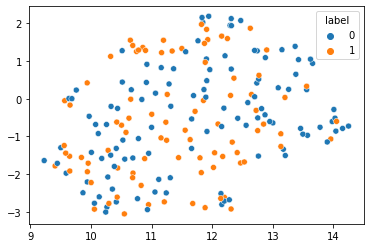

In [15]:
# Choose the paramters that you think are best and apply to test set [ / 4 marks]
reducer = umap.UMAP(n_neighbors = n_neighbors[2],               
                    n_components = 2,              
                    metric = 'cosine',          
                    n_epochs = 1000,               
                    min_dist = min_dist[0],                
                    spread = 1.0,                  
                    low_memory = False,             
                    n_jobs = -1,
                    init = 'random',               
                    random_state = seed,             
                    verbose = True                 
                   )
UMAP_embedding = reducer.fit_transform(TFIDF_test)

# Create plot [ /2 marks]
sns.scatterplot(x = UMAP_embedding[:, 0], y = UMAP_embedding[:, 1], hue = testData['label'])


**Question:** How does the plot compare to the PCA one? [ /2 marks]

**Your answer:** This plot is much more centered than the left leaning datapoints in the PCA plot. When using a high number of neighbours we can also start to see a much clearer distinction between the two sentiments.

## Task 2: Benchmarking predictive capabilities of the compressed data [ / 34 marks]

For this task, we will benchmark the predictive capabilities of the compressed data against the original one. 



### Question 2.1 
Train a regularized logistic regression over the original TfIDF train set (with no compression) using l2 regularization. Calculate the AUC score and plot the ROC curve for the original test set.

AUC Score: 0.704099277794731


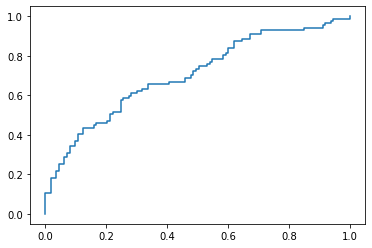

In [16]:
# Train and test using model LogisticRegressionCV [ /4 marks]
# Define the model
# Fit on the training dataset
logRegCV = LogisticRegressionCV(penalty = 'l2', random_state = seed).fit(TFIDF_train_q2, trainData['label'])

# Apply to the test dataset
pred = logRegCV.predict(TFIDF_test_q2)
predprob = logRegCV.predict_proba(TFIDF_test_q2)[::, 1]

# Plot ROC curve and compute AUC score [ /4 marks]
# Calculate the ROC curve points and plot
fpr, tpr, _ = roc_curve(testData['label'], predprob)
plt.plot(fpr, tpr)

# Calculate the AUC and print it
auc = roc_auc_score(testData['label'], predprob)
print(f'AUC Score: {auc}')



### Question 2.2 
Train a regularized logistic regression over an SVD-reduced dataset (with 10 components) using l2 regularization. Calculate the AUC score and plot the ROC curve for the SVD-transformed test set.

AUC Score: 0.49364255925134776


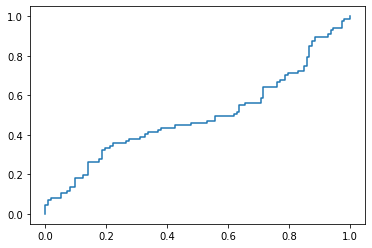

In [17]:
# Apply SVD first [ / 4 marks]
svd = TruncatedSVD(n_components = 10, 
                   n_iter = 10,
                   random_state = seed
                  )
TFIDF_train_q2_svd = svd.fit_transform(TFIDF_train_q2)
TFIDF_test_q2_svd = svd.fit_transform(TFIDF_test_q2)

# Train and test using model LogisticRegressionCV [ /4 marks]
# Define the model
logRegCV = LogisticRegressionCV(penalty = 'l2', random_state = seed).fit(TFIDF_train_q2_svd, trainData['label'])

# Apply to the test dataset
pred = logRegCV.predict(TFIDF_test_q2_svd)
predprob = logRegCV.predict_proba(TFIDF_test_q2_svd)[::, 1]

# Plot ROC curve and compute AUC score [ /4 marks]
# Calculate the ROC curve points and plot
fpr, tpr, _ = roc_curve(testData['label'], predprob)
plt.plot(fpr, tpr)

# Calculate the AUC and print it
auc = roc_auc_score(testData['label'], predprob)
print(f'AUC Score: {auc}')

### Question 2.3 
Train a regularized logistic regression over the UMAP-reduced dataset (with 10 components using the same parameters as Task 1.5) using l2 regularization. Calculate the AUC score and plot the ROC curve for the UMAP-transformed test set.

UMAP(angular_rp_forest=True, init='random', low_memory=False, metric='cosine', n_components=10, n_epochs=1000, n_neighbors=25, random_state=0, verbose=True)
Fri Dec  9 03:03:45 2022 Construct fuzzy simplicial set
Fri Dec  9 03:03:45 2022 Finding Nearest Neighbors
Fri Dec  9 03:03:47 2022 Finished Nearest Neighbor Search
Fri Dec  9 03:03:47 2022 Construct embedding


Epochs completed:   0%|            0/1000 [00:00]

Fri Dec  9 03:03:57 2022 Finished embedding
UMAP(angular_rp_forest=True, init='random', low_memory=False, metric='cosine', n_components=10, n_epochs=1000, n_neighbors=25, random_state=0, verbose=True)
Fri Dec  9 03:03:57 2022 Construct fuzzy simplicial set
Fri Dec  9 03:03:57 2022 Finding Nearest Neighbors
Fri Dec  9 03:03:57 2022 Finished Nearest Neighbor Search
Fri Dec  9 03:03:57 2022 Construct embedding


Epochs completed:   0%|            0/1000 [00:00]

Fri Dec  9 03:04:00 2022 Finished embedding


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

AUC Score: 0.5185637269860646


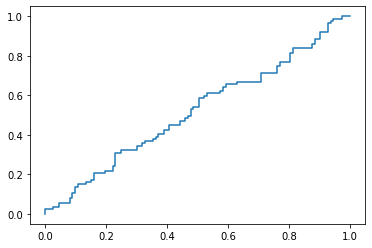

In [18]:
# Apply UMAP first [ / 4 marks]
reducer = umap.UMAP(n_neighbors = n_neighbors[2],               
                    n_components = 10,              
                    metric = 'cosine',          
                    n_epochs = 1000,               
                    min_dist = min_dist[0],                
                    spread = 1.0,                  
                    low_memory = False,             
                    n_jobs = -1,
                    init = 'random',               
                    random_state = seed,             
                    verbose = True                 
                   )
TFIDF_train_UMAP = reducer.fit_transform(TFIDF_train_q2)
TFIDF_test_UMAP = reducer.fit_transform(TFIDF_test_q2)

# Train and test using model LogisticRegressionCV [ /4 marks]
# Define the model
logRegCV = LogisticRegressionCV(penalty = 'l2', random_state = seed).fit(TFIDF_train_UMAP, trainData['label'])

# Apply to the test dataset
pred = logRegCV.predict(TFIDF_test_UMAP)
predprob = logRegCV.predict_proba(TFIDF_test_UMAP)[::, 1]

# Plot ROC curve and compute AUC score [ /4 marks]
# Calculate the ROC curve points and plot
fpr, tpr, _ = roc_curve(testData['label'], predprob)
plt.plot(fpr, tpr)

# Calculate the AUC and print it
auc = roc_auc_score(testData['label'], predprob)
print(f'AUC Score: {auc}')

### Question 2.4 
Compare the performance of the three models. Which one is the best. [ / 2 marks] 

**Your Answer:** SVD had the worst model, with UMAP model in 2nd and the Q2.1 model being the best